In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, precision_score, precision_recall_curve, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize

In [4]:
train_data = pd.read_csv('/content/train_data.txt', sep=' ::: ', engine='python', header=None)
test_data = pd.read_csv('/content/test_data.txt', sep=' ::: ', engine='python', header=None)
test_data_solution = pd.read_csv('/content/test_data_solution.txt', sep=' ::: ', engine='python', header=None)
# print(test_data)
train_data.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [5]:
train_title = train_data.iloc[:,1]
train_genre = train_data.iloc[:,2]
train_description = train_data.iloc[:,3]

test_title = test_data.iloc[:,1]
test_description = test_data.iloc[:,2]
# train_title.head()

train_text_features = train_title + ' ' + train_description
test_text_features = test_title + ' ' + test_description

In [7]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [8]:
x_train = vectorizer.fit_transform(train_text_features)
y_train = train_genre
x_test = vectorizer.transform(test_text_features)

In [9]:
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

In [10]:
test_genre = test_data_solution.iloc[:,2]
y_test = test_genre

In [12]:
print("Number of samples in test_data:", len(test_data))
print("Number of samples in test_data_solution:", len(test_data_solution))

min_length = min(len(test_data), len(test_data_solution))
test_data = test_data.iloc[:min_length]
test_data_solution = test_data_solution.iloc[:min_length]

test_title = test_data.iloc[:,1]
test_description = test_data.iloc[:,2]
test_text_features = test_title + ' ' + test_description
x_test = vectorizer.transform(test_text_features)
test_genre = test_data_solution.iloc[:,2]

Number of samples in test_data: 35989
Number of samples in test_data_solution: 35343


In [13]:
y_pred = clf.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred, zero_division=0))
print("Precision: ", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.5143875732111026
Classification Report: 
              precision    recall  f1-score   support

      action       0.62      0.07      0.12       878
       adult       0.53      0.03      0.05       372
   adventure       0.76      0.08      0.14       504
   animation       0.00      0.00      0.00       331
   biography       0.00      0.00      0.00       160
      comedy       0.52      0.41      0.45      4832
       crime       0.00      0.00      0.00       328
 documentary       0.56      0.87      0.68      8536
       drama       0.45      0.83      0.59      8958
      family       0.00      0.00      0.00       519
     fantasy       0.00      0.00      0.00       197
   game-show       0.95      0.18      0.30       116
     history       0.00      0.00      0.00       154
      horror       0.70      0.29      0.41      1433
       music       0.89      0.06      0.11       506
     musical       0.00      0.00      0.00       169
     mystery       0.00    

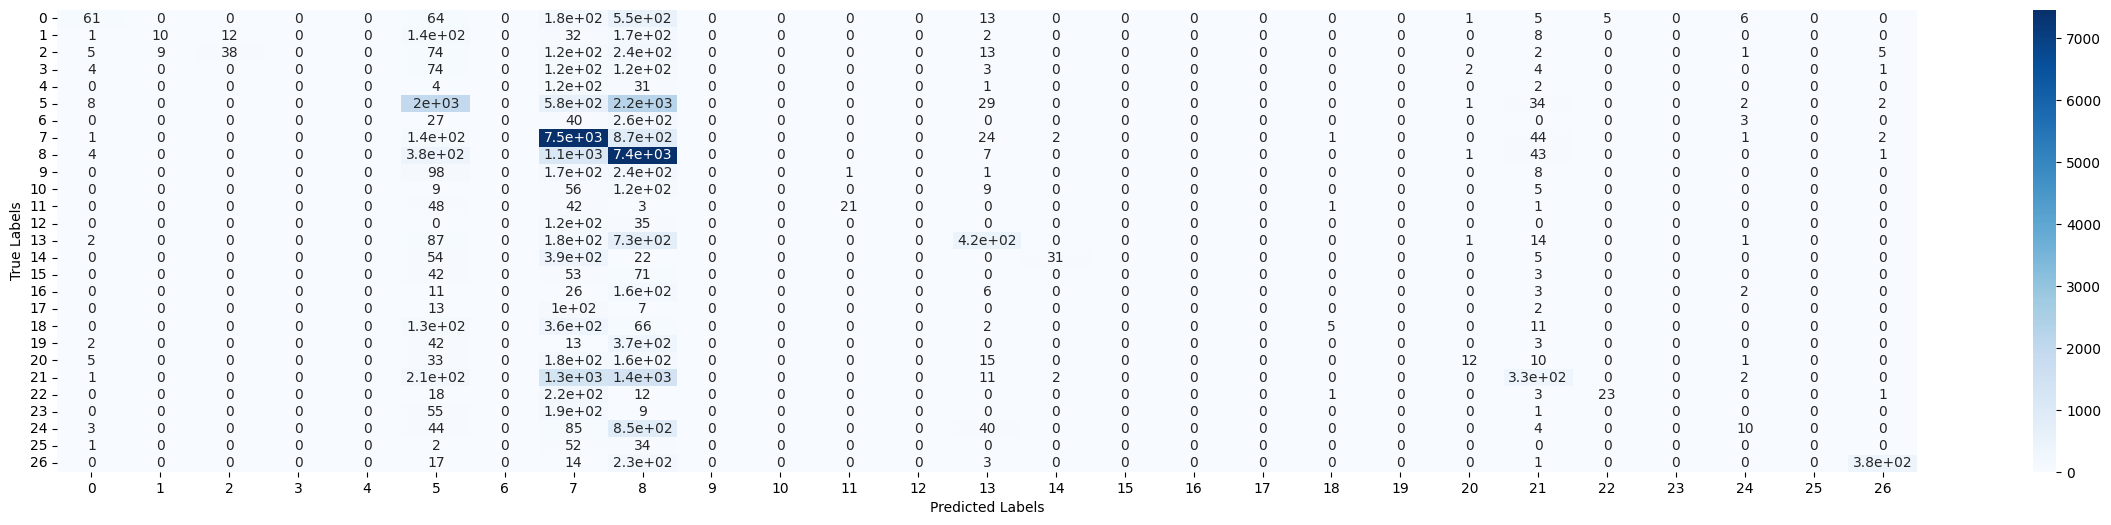

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(30,6))

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [15]:
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
plt.figure(figsize=(8,6))
f1_scores = [report[x]["f1-score"] for x in report.keys() if x != "accuracy" and x != "macro avg" and x != "weighted avg"]
class_labels = [x for x in report.keys() if x != "accuracy" and x != "macro avg" and x != "weighted avg"]


<Figure size 800x600 with 0 Axes>

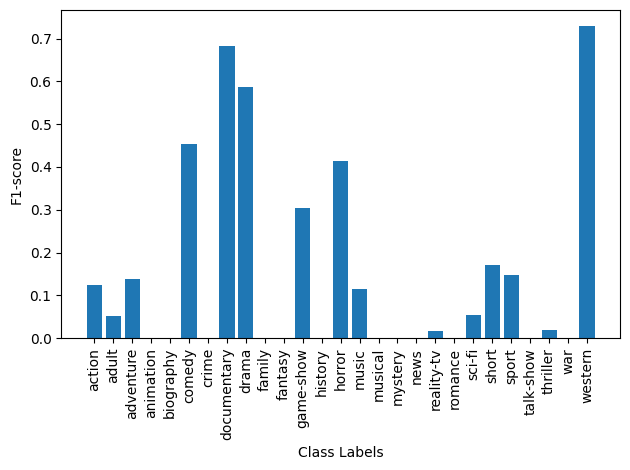

In [16]:
plt.bar(class_labels, f1_scores)
plt.xlabel("Class Labels")
plt.ylabel("F1-score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

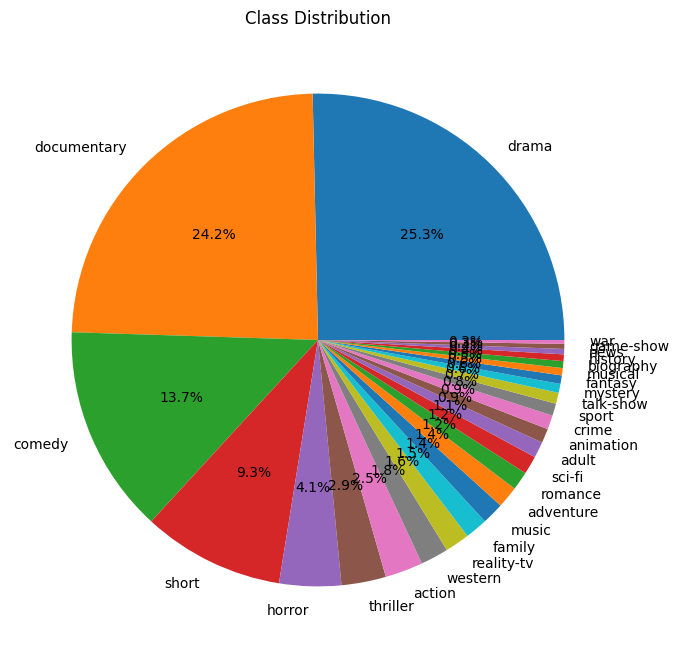

In [18]:
class_counts = y_test.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()